In [69]:
# data=[{'Name':'xyz','id':'123'},{'Name':'abc','id':'143'},{'Name':'xy','id':'1423'},{'Name':'aba','id':'12'},{'Name':'yz','id':'13'}]
# type(data[0])

# def filtering(Data,name,value):
#     matched=[]
#     for row in Data:
#         if row.get(name)==value:
#             matched.append(row)
#     return matched
# result=filtering(data,"Name","xy")
# print(result)
    
#Time complexity O(n)

In [70]:
import pandas as pd
import numpy as np

df=pd.read_csv("C:/Users/VIVEK/OneDrive/Desktop/DATA Sci. Material/dataset cleaning/playstore.csv")

In [71]:

df.sample(10)


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
744,Anglerfish Simulator,com.unity.cream.chouchinankou,Simulation,3.8,35.0,"5,000+",5000,5426,True,0.0,...,https://unityapp.xyz,aprdevmsg0303@gmail.com,"Dec 10, 2018","Aug 06, 2020",Everyone,https://unityapp.xyz,True,False,False,16-06-2021 02:48
902,Bike Sheba,com.wBikeSheba_12523891,Shopping,0.0,0.0,50+,50,92,True,0.0,...,NaN,admin@apkpcapps.ml,"Nov 10, 2020","Nov 10, 2020",Everyone,https://android-appprivacypolicy.blogspot.com/...,False,False,False,16-06-2021 02:48
768,Fm radio country music english country songs,com.freeradioapps.fmradiocountrymusic.englishc...,Music & Audio,0.0,0.0,10+,10,44,True,0.0,...,NaN,franchodesarrollador@gmail.com,"Jan 4, 2019","Jan 04, 2019",Teen,https://www.facebook.com/notes/todas-las-apps/...,True,False,False,16-06-2021 02:48
734,Moon phases,com.tips.fazyluny,Education,4.4,8.0,"1,000+",1000,2408,True,0.0,...,NaN,fprudnikov2018@yandex.ru,"Jan 19, 2019","Jan 19, 2019",Everyone,https://www.appodeal.com/home/privacy-policy/,True,False,False,16-06-2021 02:48
527,Whats Direct,br.com.ewebsistemas.whatsdirect,Communication,0.0,0.0,10+,10,33,True,0.0,...,NaN,eder.novais@gmail.com,"Jul 4, 2019","Jul 10, 2019",Everyone,NaN,True,False,False,16-06-2021 02:48
23,BREAKTHROUGH ACADEMY,com.megasporangium.connect,Education,0.0,0.0,1+,1,3,True,0.0,...,NaN,winualldevs@gmail.com,"Apr 30, 2021","May 17, 2021",Everyone,https://www.winuall.com/privacy-policy,False,False,False,16-06-2021 02:47
811,Libreviaje,test.webiew,Travel & Local,5.0,5.0,100+,100,116,True,0.0,...,https://libreviaje.com/,admin@libreviaje.com,"Jun 27, 2019","Jul 03, 2019",Teen,https://libreviaje.com/politicas,False,False,False,16-06-2021 02:48
378,Rádio Web Elshaday,io.kodular.foxaplicativos2019.Radio_Web_Elshaday,Music & Audio,0.0,0.0,10+,10,24,True,0.0,...,http://foxstreamhost.com.br,foxbatidao@gmail.com,"Jun 16, 2019","Jun 16, 2019",Everyone,NaN,True,False,False,16-06-2021 02:48
494,Donald Dumper - Dump on Trump,com.ajayinkingston.trumpdumper,Action,0.0,0.0,100+,100,151,True,0.0,...,http://www.ajayinkingston.com,dev@ajayinkingston.com,"Mar 29, 2016","Aug 20, 2016",Mature 17+,NaN,True,False,False,16-06-2021 02:48
559,MarketUP ERP,com.marketup.mobile,Productivity,3.0,971.0,"100,000+",100000,153664,True,0.0,...,https://marketup.com,mobile@marketup.com,NaN,"Oct 22, 2020",Everyone,https://marketup.com/politica-de-privacidade,True,False,False,16-06-2021 02:48


In [72]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [73]:
df.duplicated().sum()

0

In [74]:
df.isnull().sum()

App Name               0
App Id                 0
Category               0
Rating                11
Rating Count          11
Installs               0
Minimum Installs       0
Maximum Installs       0
Free                   0
Price                  0
Currency               0
Size                   0
Minimum Android        1
Developer Id           0
Developer Website    328
Developer Email        0
Released              38
Last Updated           0
Content Rating         0
Privacy Policy       173
Ad Supported           0
In App Purchases       0
Editors Choice         0
Scraped Time           0
dtype: int64

In [75]:
#Working with install column, removing the + symbol.

df['Installs'].unique()

array(['50+', '100,000+', '5+', '500+', '1,000+', '10,000+', '1,000,000+',
       '10+', '1+', '50,000+', '5,000+', '100+', '500,000+', '0+',
       '5,000,000+', '50,000,000+', '10,000,000+'], dtype=object)

In [76]:
df['Installs']=df['Installs'].str.strip('+')

df['Installs']=df['Installs'].str.replace(',','')


df['Installs']=df['Installs'].apply(lambda x: int(x))

type(df['Installs'][99])


numpy.int64

In [77]:

df['Size'].sample(10).unique()

array(['40M', '1.1M', '2.9M', '8.8M', '16M', '3.0M', '9.3M', '14M', '11M',
       '15M'], dtype=object)

In [78]:
#Working with the size column, changing all the memory requirement into mb format and removing the mb label in the end. 

df['Size']=df['Size'].apply(lambda x: float(str(x).replace('G',''))*1000 if 'G' in str(x) else x) #converting GB data to MB and removing the G to turn the data to float

df['Size']=df['Size'].apply(lambda x: float(str(x).replace('k',''))/1000 if 'k' in str(x) else x) #converting KB data to MB and removing the k to turn the data to float

df['Size']=df['Size'].apply(lambda x: float(str(x).replace('M','')) if 'M' in str(x) else x)

In [79]:

df['Size'].sample(10).unique()

array([7.4, 13.0, 'Varies with device', 8.6, 17.0, 2.9, 5.0, 7.8, 8.2,
       147.0], dtype=object)

In [80]:
type(df['Size'][0])

float

In [81]:

df.sample(7)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
310,texture tie,com.texturetie.AppQkuk80,Lifestyle,0.0,0.0,100,100,412,True,0.0,...,NaN,appkikuk@gmail.com,"Jun 21, 2016","Dec 03, 2018",Everyone,NaN,True,False,False,16-06-2021 02:48
940,Saad Al Ghamdi Quran Offline 2020,com.quranoffline.quranmajeed.saad_alghamdi,Music & Audio,0.0,0.0,100,100,260,True,0.0,...,NaN,mobeenjaved88@gmail.com,"Nov 18, 2019","Dec 27, 2019",Everyone,NaN,True,False,False,16-06-2021 02:48
513,Gold's Gym Citrus Heights,com.migy.com.GoldsGymCitrusHeights,Health & Fitness,4.2,6.0,500,500,990,True,0.0,...,http://www.migymapp.com,support@migymapp.com,"Nov 7, 2017","Mar 25, 2021",Everyone,http://migym.com/privacy-policy,False,False,False,16-06-2021 02:48
915,Cute Cat Wallpaper,com.newandromo.dev637521.app816182,Personalization,0.0,0.0,100,100,251,True,0.0,...,NaN,tukangopi@gmail.com,"Jul 7, 2020","Jul 07, 2020",Teen,https://docs.google.com/document/d/1UYkt4XiWnd...,True,False,False,16-06-2021 02:48
69,Manga Renta,com.ebookrenta.en_app,Comics,3.7,357.0,100000,100000,125874,True,0.0,...,http://www.ebookrenta.com/,support@ebookrenta.com,"Sep 12, 2018","May 14, 2020",Teen,https://www.ebookrenta.com/renta/sc/frm/page/h...,False,False,False,16-06-2021 02:47
210,Feedlot Profit and Loss Calculator,com.trevorwiebe.profitandloss,Tools,0.0,0.0,50,50,56,True,0.0,...,NaN,thisistrevor4@gmail.com,"Jun 11, 2019","Apr 04, 2020",Everyone,https://profit-and-loss-calculator.firebaseapp...,True,False,False,16-06-2021 02:48
143,All in One Status 2019,com.diskpoly.all_in_onestatus,Entertainment,5.0,10.0,10,10,34,True,0.0,...,NaN,durgesh9654606576sgh@gmail.com,"Apr 9, 2019","Apr 10, 2019",Everyone,NaN,True,False,False,16-06-2021 02:48


In [82]:
df.iloc[10]

App Name             Swiss Cantons - Quiz about Switzerland's Geogr...
App Id                                        com.asmolgam.switzerland
Category                                                        Trivia
Rating                                                             4.5
Rating Count                                                    1452.0
Installs                                                        100000
Minimum Installs                                                100000
Maximum Installs                                                121554
Free                                                              True
Price                                                              0.0
Currency                                                           USD
Size                                                               6.0
Minimum Android                                             4.4 and up
Developer Id                                           Andrey Solovyev
Develo

In [83]:
df['Free'].dtype

dtype('bool')

In [84]:
df['Free']=df['Free'].apply(lambda x: str(x))

In [85]:
df['Free'].astype(str)

0      True
1      True
2      True
3      True
4      True
       ... 
994    True
995    True
996    True
997    True
998    True
Name: Free, Length: 999, dtype: object

In [86]:
df['Free']=df['Free'].str.replace('True','Free')

In [87]:
df['Free']=df['Free'].str.replace('False','Paid')

In [88]:
df['Free'].unique()

array(['Free', 'Paid'], dtype=object)

In [89]:
df[df['Free']=='Paid'].sample()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
360,Healthy Recipes No-Ads,com.noads.healthyrecipes,Lifestyle,0.0,0.0,50,50,61,Paid,1.99,...,NaN,mobinetdev@gmail.com,"Jun 9, 2016","Jul 03, 2016",Everyone,http://topchefcooking.com/privacy-policy-apps/,False,False,False,16-06-2021 02:48


In [90]:
type(df['Content Rating'][0])     

str

In [91]:
df['Content Rating'].unique()

array(['Everyone', 'Everyone 10+', 'Teen', 'Mature 17+'], dtype=object)

In [92]:
#We can make these categories to simple 3 categories like Teenagers, Adults and Every one.

df['Content Rating']=df['Content Rating'].replace('Teen','Teenagers')

df['Content Rating']=df['Content Rating'].replace('Everyone 10+','Teenagers')

df['Content Rating']=df['Content Rating'].replace('Mature 17+','Adults')

df['Content Rating'].unique()

array(['Everyone', 'Teenagers', 'Adults'], dtype=object)

In [93]:
df['Rating Count']

0        9.0
1      346.0
2        0.0
3        7.0
4        0.0
       ...  
994     11.0
995     67.0
996      5.0
997      0.0
998      0.0
Name: Rating Count, Length: 999, dtype: float64

In [94]:
def categorize(x):
    if x == 0.0:
        return 'No rating'
    elif x < 10000.0:
        return 'less than 10K'
    elif 10000.0 <= x <= 500000.0:
        return 'between 10k and 500k'
    else:
        return 'more than 500k'

df['Rating_category'] = df['Rating Count'].apply(categorize)


In [95]:
df['Rating_category'].unique()

array(['less than 10K', 'No rating', 'more than 500k',
       'between 10k and 500k'], dtype=object)

In [96]:
# df['Rating_category'].sample(10)

<BarContainer object of 4 artists>

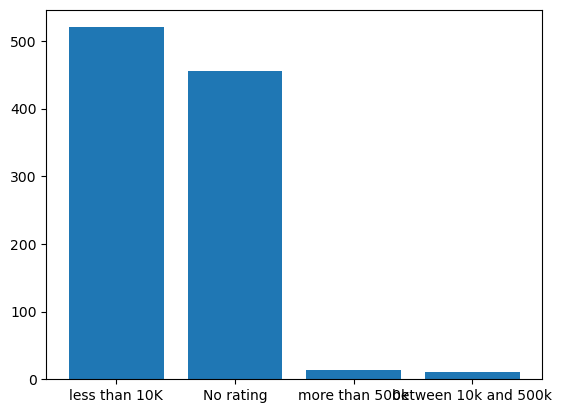

In [97]:
import matplotlib.pyplot as plt


plt.bar(df['Rating_category'].unique(),df['Rating_category'].value_counts())

In [98]:
import plotly.graph_objects as go
import plotly.express as px


In [99]:
fig = go.Figure()

fig.add_scatter(
x=df['Installs'],y=df['Rating_category']=="No rating",
mode="markers",
marker={"color": "orange"},
name="No rating  vs Installation")

In [100]:
px.line(df.query("Rating_category in ['No rating','less than 10K']"),
    x='Installs',
    y='Rating_category',color='Rating_category',
    # color_discrete_map={
    #     "":"orange",
    #      "":"green"}
     )

In [137]:
px.pie(df.query("Free == Free and Rating_category in Rating_category").sort_values('Installs', ascending=True),values='Installs',names="Rating_category",title="Installs for free apps Rating_category",hole=0.55,color_discrete_sequence=px.colors.qualitative.Pastel1)

In [102]:
df.iloc[1]

App Name                                 Garden Photo Frame
App Id                app.tocus.photoframe.gardenphotoframe
Category                                        Photography
Rating                                                  4.4
Rating Count                                          346.0
Installs                                             100000
Minimum Installs                                     100000
Maximum Installs                                     170906
Free                                                   Free
Price                                                   0.0
Currency                                                USD
Size                                                    5.2
Minimum Android                                  4.1 and up
Developer Id                                      Tocus App
Developer Website                 https://tocusinfotech.com
Developer Email                         tocus.app@gmail.com
Released                                

In [103]:
px.scatter(df.query("Free == Free"), x="Content Rating", y="Maximum Installs",
	          color="Rating_category")

In [104]:
df.describe()

,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price
count,988.000000,988.000000,9.990000e+02,9.990000e+02,9.990000e+02,999.000000
mean,2.214575,928.077935,9.593281e+04,9.593281e+04,1.337427e+05,0.147928
std,2.104188,8571.736061,1.631240e+06,1.631240e+06,1.823724e+06,2.888836
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,0.000000,5.000000e+01,5.000000e+01,8.950000e+01,0.000000
50%,2.950000,6.000000,5.000000e+02,5.000000e+02,8.330000e+02,0.000000
75%,4.300000,49.000000,1.000000e+04,1.000000e+04,1.005850e+04,0.000000
max,5.000000,139393.000000,5.000000e+07,5.000000e+07,5.341120e+07,89.990000


In [105]:
df['Rating_category'].value_counts()

less than 10K           520
No rating               455
between 10k and 500k     13
more than 500k           11
Name: Rating_category, dtype: int64

In [106]:
import seaborn as sns

df['Maximum Installs']

0          65
1      170906
2           7
3         867
4        1605
        ...  
994      1800
995      4438
996     10087
997       224
998        75
Name: Maximum Installs, Length: 999, dtype: int64

<AxesSubplot:xlabel='Free', ylabel='Price'>

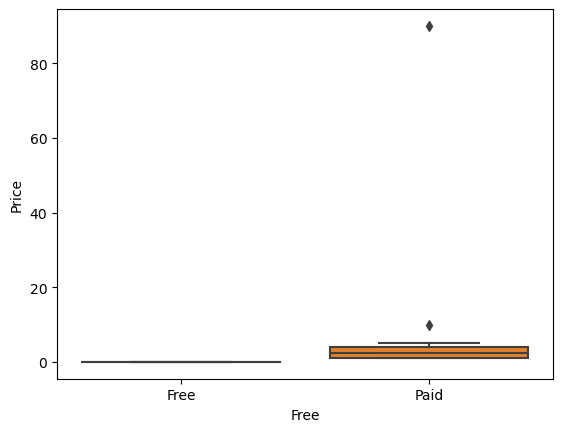

In [107]:
sns.boxplot(x='Free',y='Price', data=df)

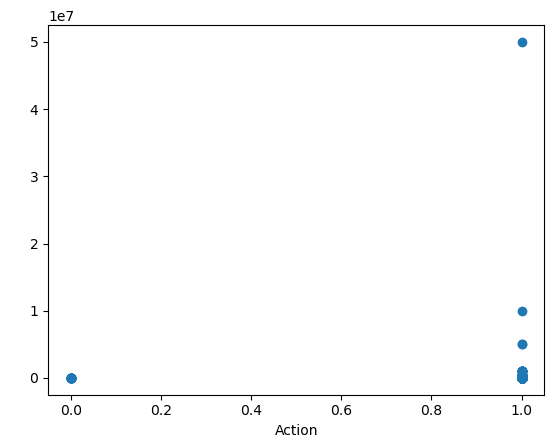

In [108]:
plt.scatter(df['Free']=='Free',df['Installs'])
plt.xlabel('Action')
plt.ylabel(' ')
plt.show()

In [120]:
# def scatter(col):
#      x=1
#      fig=plt.figure(figsize=(20,5))
#      for i in col:
#           plt.subplot(1,3,x)
#           sns.scatterplot(x=i,y="price",data=df,color="red")
#           x+=1
# scatter(df['Installs'])

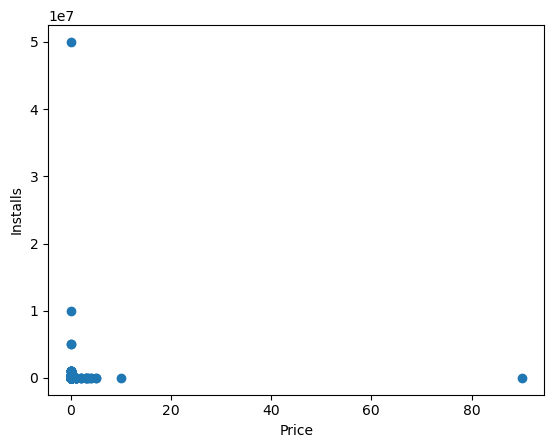

In [ ]:
plt.scatter(df['Price'],df['Installs'])
plt.xlabel('Price')
plt.ylabel('Installs')
plt.show()

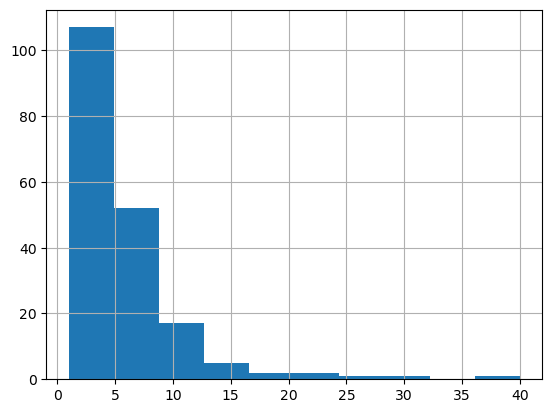

In [125]:

df['Size'].value_counts().plot(kind='hist')
plt.xlabel('')
plt.ylabel('')
plt.grid()
plt.show()


In [ ]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time', 'Rating_category'],
      dtype='object')

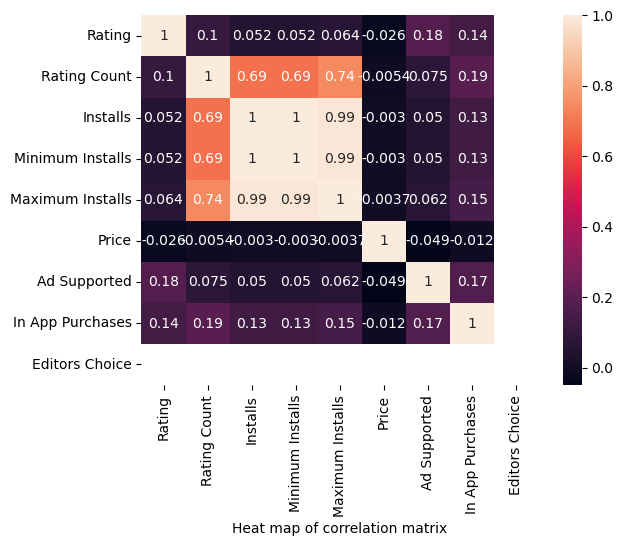

In [110]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.xlabel('Heat map of correlation matrix')
plt.show()


The Maximum install and rating count columns have a strong +ve correlation from the readings of the above correlation matrix heat map

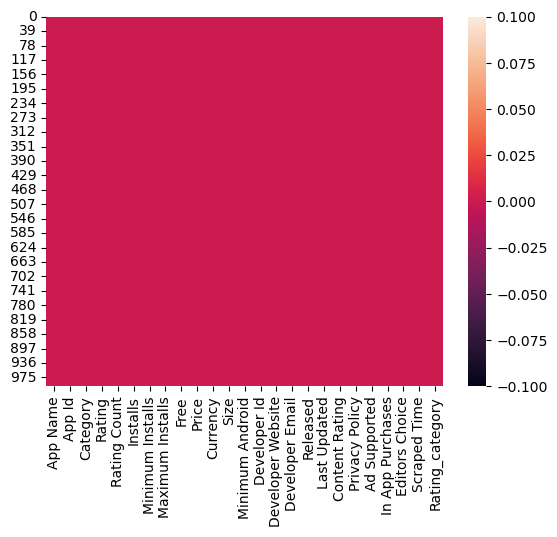

In [ ]:
sns.heatmap(df.isnull())
plt.show()

In [ ]:
df.isnull()==True

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Rating_category
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.fillna('',inplace=True)

In [ ]:
df.isnull().sum()

App Name             0
App Id               0
Category             0
Rating               0
Rating Count         0
Installs             0
Minimum Installs     0
Maximum Installs     0
Free                 0
Price                0
Currency             0
Size                 0
Minimum Android      0
Developer Id         0
Developer Website    0
Developer Email      0
Released             0
Last Updated         0
Content Rating       0
Privacy Policy       0
Ad Supported         0
In App Purchases     0
Editors Choice       0
Scraped Time         0
Rating_category      0
dtype: int64

<AxesSubplot:xlabel='Installs', ylabel='Rating Count'>

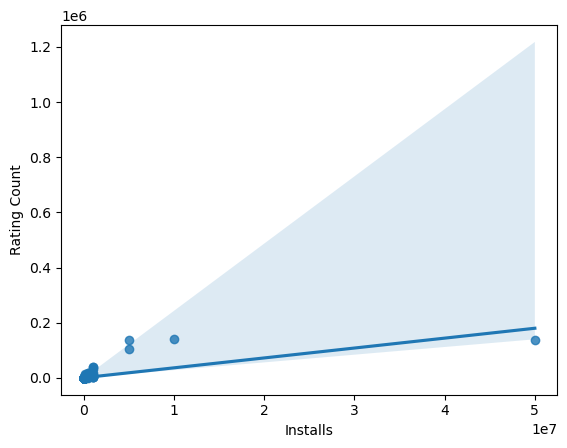

In [115]:
sns.regplot(x='Installs',y='Rating Count',data=df)

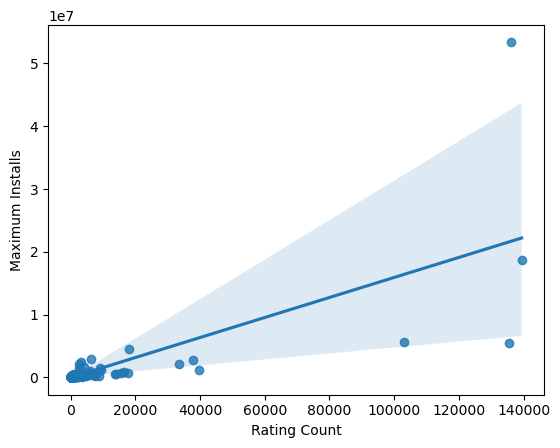

In [130]:
sns.regplot(data=df,x='Rating Count',y='Maximum Installs')

plt.show()